# **Structural Path Analysis examination**

---



In [ ]:
# I ofc also want to load results from the base model run I saved
import numpy as np
import pandas as pd

all_results = pd.read_csv('/content/drive/MyDrive/Yannis/1990-2016_results_analysis.csv')

data.keys()
all_results.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Sector Country  Year   Total Impact  \
0                   Agriculture     AFG  1990  364744.779059   
1                       Fishing     AFG  1990   12697.561975   
2          Mining and Quarrying     AFG  1990   67260.139417   
3              Food & Beverages     AFG  1990  109591.576409   
4  Textiles and Wearing Apparel     AFG  1990   43790.684805   

   Eigenvector Centrality       Bonacich Centrality  Degree Centrality  \
0                0.192701   (0.1931208657423713-0j)           2.076923   
1                0.192701  (0.19312086574237133-0j)           2.076923   
2                0.192701  (0.19312086574237133-0j)           2.076923   
3                0.192701  (0.19312086574237117-0j)           2.076923   
4                0.192701  (0.19312086574237117-0j)           2.076923   

   Betweenness Centrality  In-Degree Centrality  Out-Degree Centrality  ...  \
0                     0.0              1.038462               1.038462  ...   
1                     0.0              1.038462               1.038462  ...   
2                     0.0              1.038462               1.038462  ...   
3                     0.0              1.038462               1.038462  ...   
4                     0.0              1.038462               1.038462  ...   

  Order_1_Paths  Order_2_Paths  Order_3_Paths  Order_4_Paths  Order_5_Paths  \
0      1.513933       0.786349       0.534851       0.404483       0.318392   
1      0.278203       0.062468       0.027460       0.015434       0.010027   
2      0.033793       0.283647       0.088939       0.068047       0.061474   
3      0.004815       0.234106       0.199502       0.139024       0.109872   
4      0.018181       0.102700       0.068650       0.045971       0.035112   

   Order_6_Paths  Order_7_Paths  Order_8_Paths  Order_9_Paths  Order_10_Paths  
0       0.265012       0.231440       0.209311       0.193725        0.181910  
1       0.007780       0.006654       0.005975       0.005503        0.005141  
2       0.057799       0.054971       0.052526       0.050288        0.048185  
3       0.093464       0.083311       0.076449       0.071407        0.067411  
4       0.030004       0.027302       0.025567       0.024233        0.023087  

[5 rows x 21 columns]

**Visualize**

---


It is important to visualize the evolution of key indicators before refining the analysis further.

                         Sector Country  Year   Total Impact  \
0                   Agriculture     AFG  1990  364744.778938   
1                       Fishing     AFG  1990   12697.561971   
2          Mining and Quarrying     AFG  1990   67260.139395   
3              Food & Beverages     AFG  1990  109591.576373   
4  Textiles and Wearing Apparel     AFG  1990   43790.684791   

   Eigenvector Centrality       Bonacich Centrality  Degree Centrality  \
0                0.192701   (0.1931208657423711-0j)           2.076923   
1                0.192701   (0.1931208657423711-0j)           2.076923   
2                0.192701    (0.193120865742371-0j)           2.076923   
3                0.192701   (0.1931208657423711-0j)           2.076923   
4                0.192701  (0.19312086574237108-0j)           2.076923   

   Betweenness Centrality  In-Degree Centrality  Out-Degree Centrality  ...  \
0                     0.0              1.038462               1.038462  ...   
1           

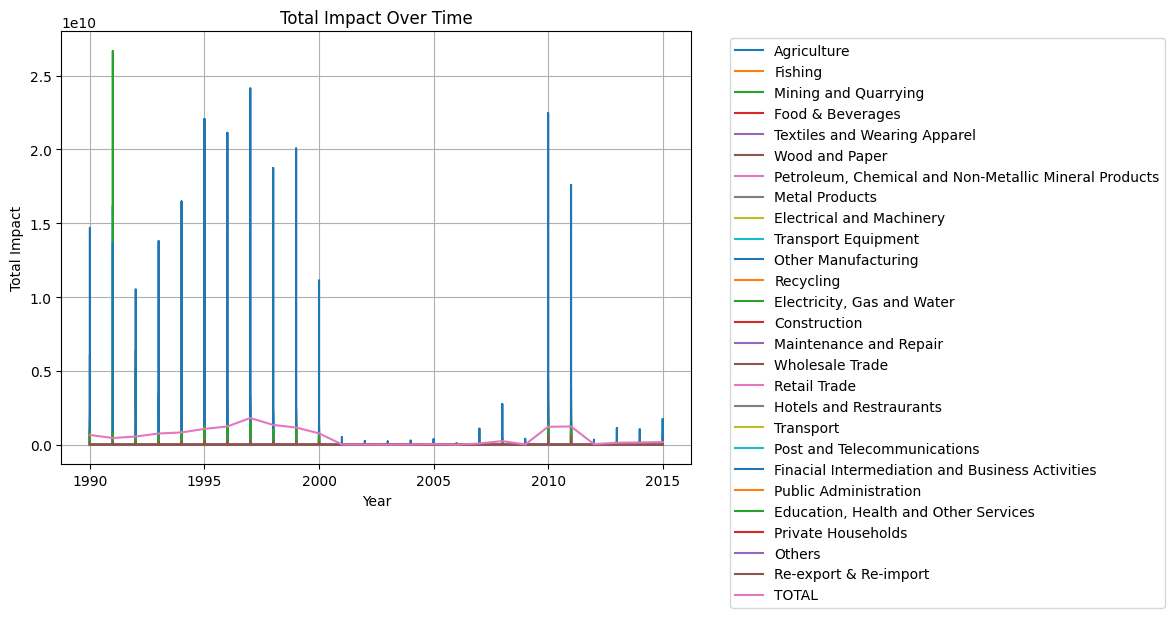

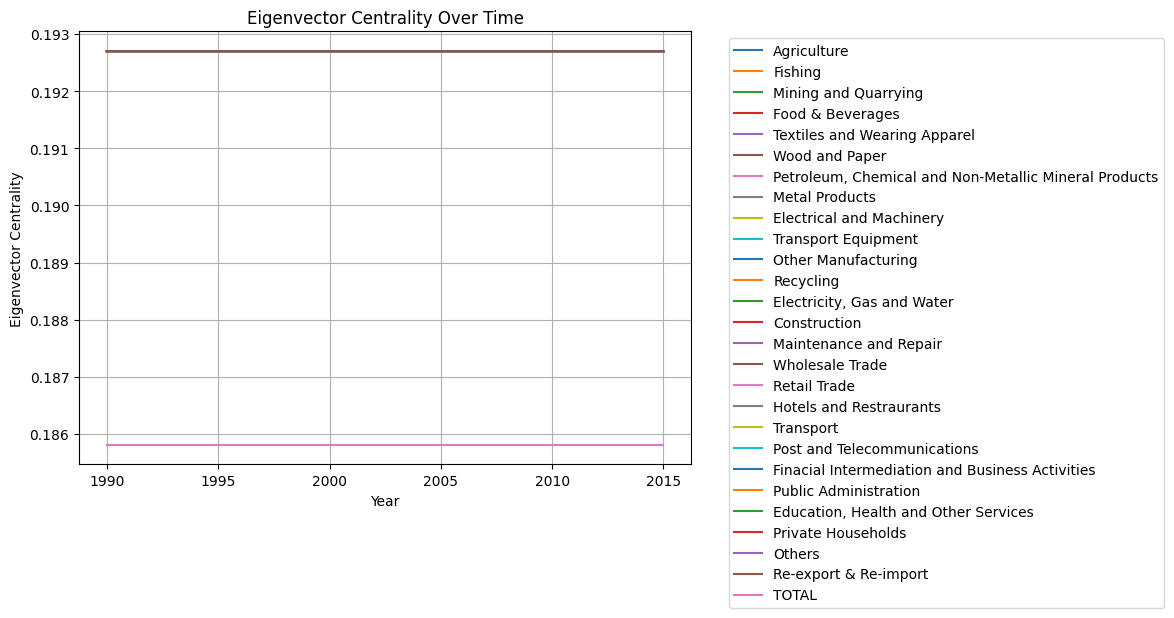

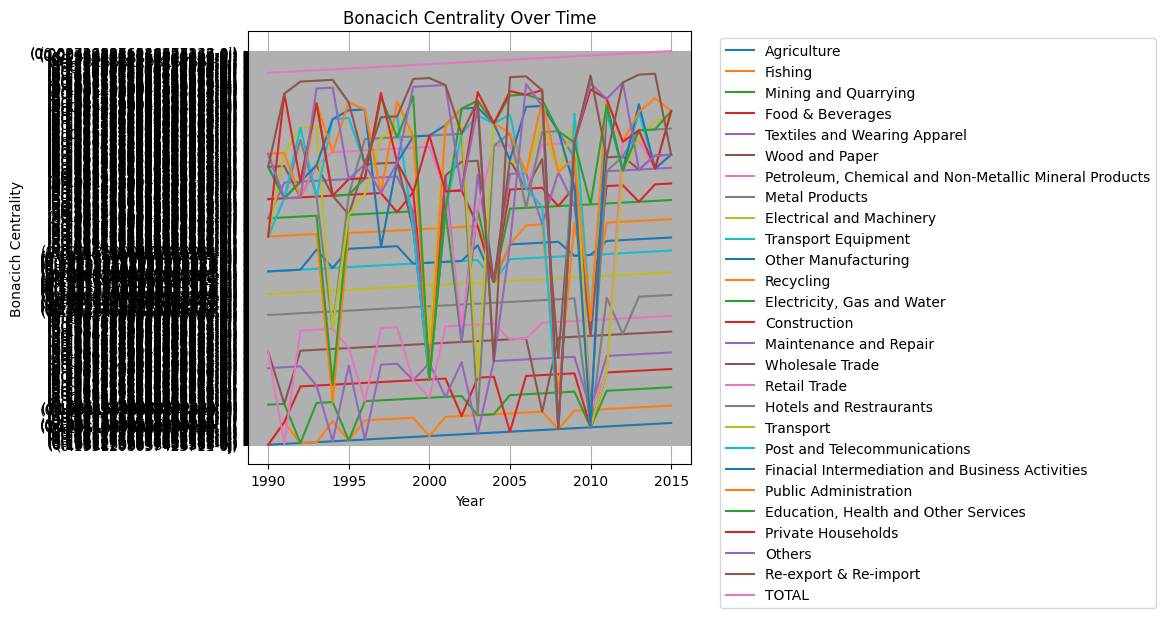

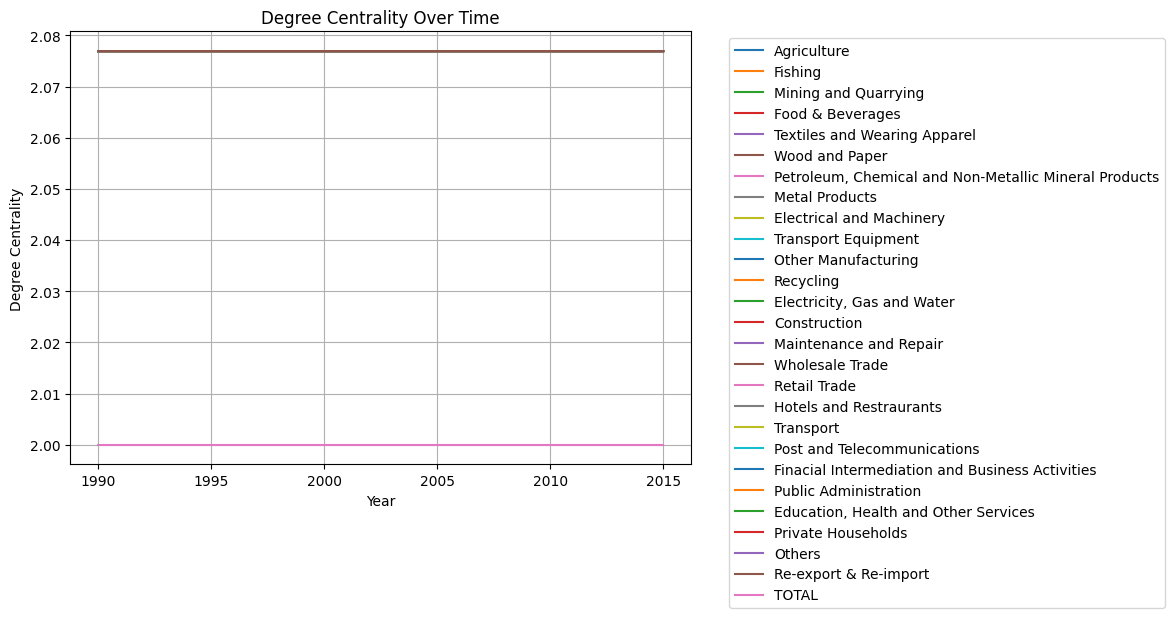

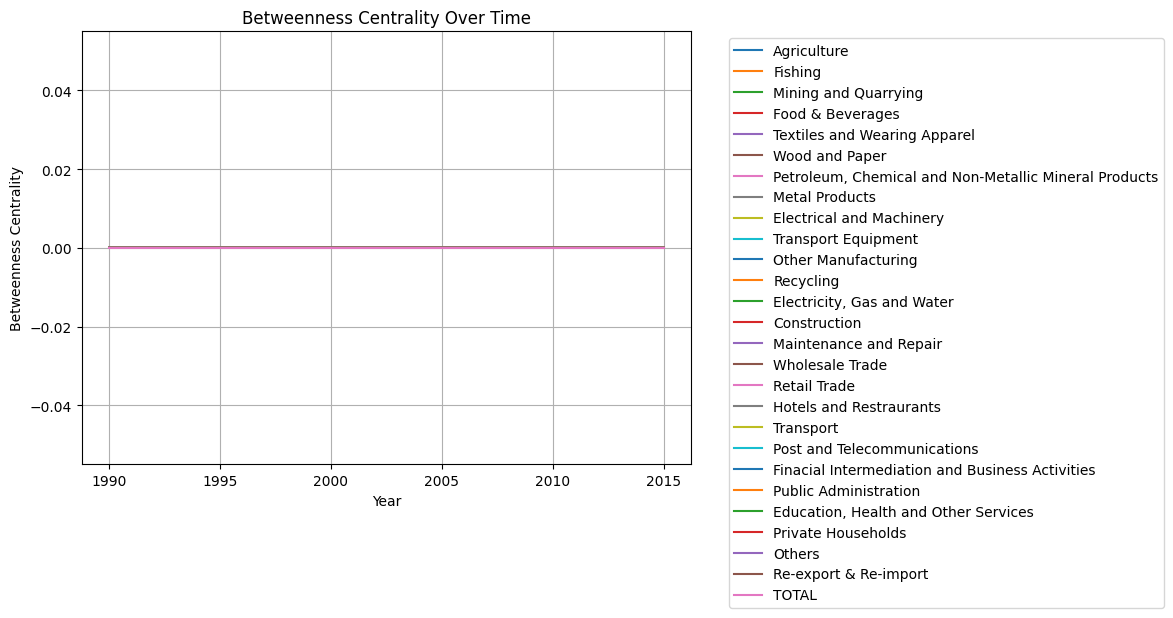

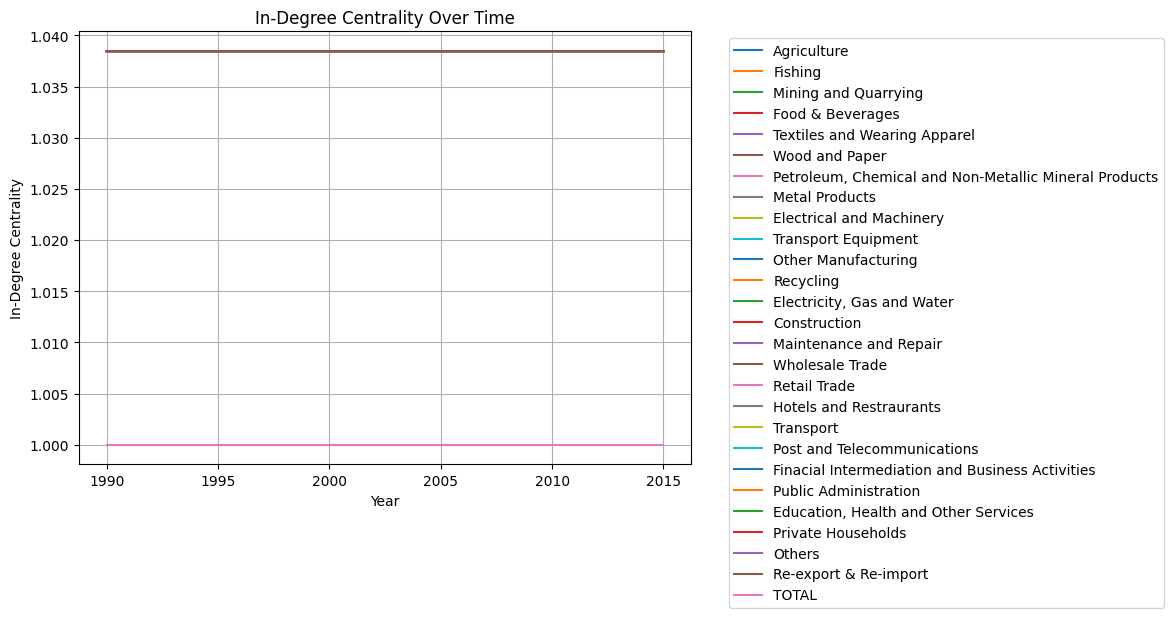

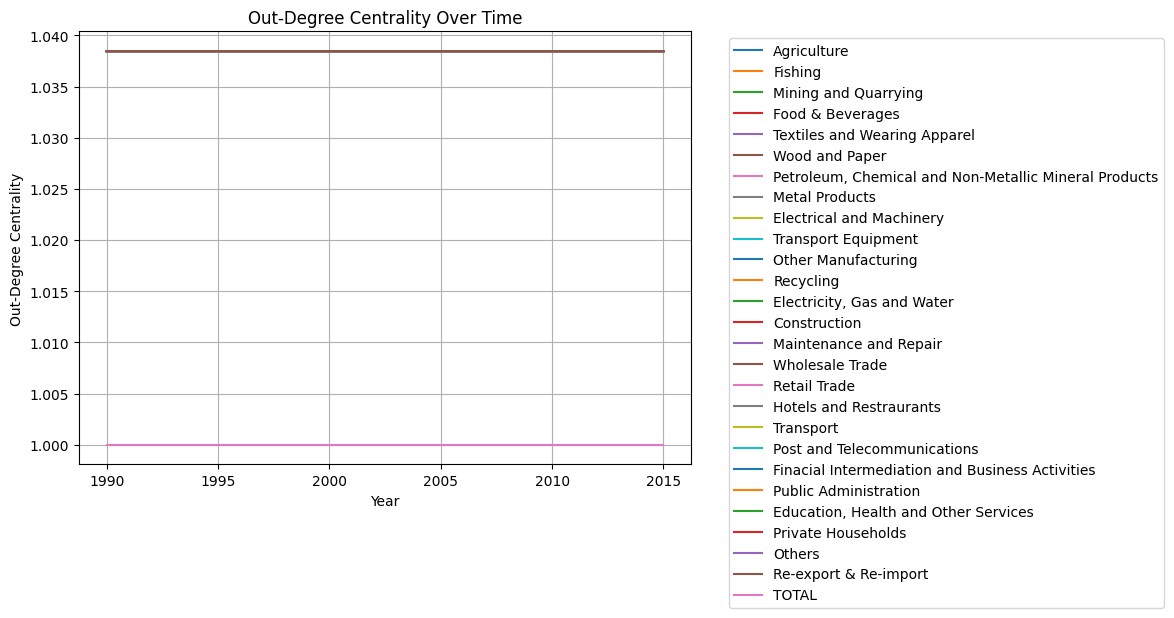

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the concatenated results CSV file
results_path = '/content/drive/MyDrive/Yannis/1990-2016_results_analysis.csv'
results = pd.read_csv(results_path)

# Display the first few rows of the DataFrame
print(results.head())

# Verify the column names in the results DataFrame
print(results.columns)

# Function to plot variable evolution over time
def plot_variable_evolution(df, variable, title, max_sectors=100):
    plt.figure(figsize=(12, 6))
    sectors = df['Sector'].unique()[:max_sectors]  # Limit the number of sectors for display
    for sector in sectors:
        sector_data = df[df['Sector'] == sector]
        plt.plot(sector_data['Year'], sector_data[variable], label=sector)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to fit legend
    plt.show()

# Define variables and their titles for plotting
variables = {
    'Total Impact': 'Total Impact Over Time',
    'Eigenvector Centrality': 'Eigenvector Centrality Over Time',
    'Bonacich Centrality': 'Bonacich Centrality Over Time',
    'Degree Centrality': 'Degree Centrality Over Time',
    'Betweenness Centrality': 'Betweenness Centrality Over Time',
    'In-Degree Centrality': 'In-Degree Centrality Over Time',
    'Out-Degree Centrality': 'Out-Degree Centrality Over Time'
}

# Plot each variable
for var, title in variables.items():
    plot_variable_evolution(results, var, title)


In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import pickle

# Example of loading the saved data for a specific year (if needed)
def load_year_data(year):
    with open(f'/content/drive/MyDrive/Yannis/variables_for_{year}.pkl', 'rb') as file:
        year_data = pickle.load(file)
    return year_data

# Load data for a specific year (e.g., 1990)
year_data_1990 = load_year_data(1990)

# Inspect the adjacency matrix
A = year_data_1990['A']
print("Adjacency Matrix (A):\n", A)

# Apply a threshold to the adjacency matrix
threshold = 0.01  # Example threshold, adjust based on your data
A_thresholded = np.where(A > threshold, A, 0)

# Check the distribution of values in the thresholded adjacency matrix
print("Thresholded Adjacency Matrix Statistics:")
print("Mean:", np.mean(A_thresholded))
print("Standard Deviation:", np.std(A_thresholded))
print("Minimum Value:", np.min(A_thresholded))
print("Maximum Value:", np.max(A_thresholded))

# Normalize the thresholded adjacency matrix
A_normalized = A_thresholded / np.max(A_thresholded)

# Create a directed graph from the normalized adjacency matrix
G_normalized = nx.DiGraph(A_normalized)

# Recompute centrality measures on the normalized graph
degree_centrality_norm = nx.degree_centrality(G_normalized)
eigenvector_centrality_norm = nx.eigenvector_centrality_numpy(G_normalized)
betweenness_centrality_norm = nx.betweenness_centrality(G_normalized)

# Print the recomputed centrality measures
print("Normalized Degree Centrality:", degree_centrality_norm)
print("Normalized Eigenvector Centrality:", eigenvector_centrality_norm)
print("Normalized Betweenness Centrality:", betweenness_centrality_norm)

Adjacency Matrix (A):
 [[4.55661829e-01 4.40787584e-03 5.46149599e-03 ... 7.32897750e-06
  6.63688677e-05 1.14312835e-05]
 [4.22572523e-04 4.38568942e-02 2.02807614e-05 ... 7.26079860e-06
  6.23703073e-05 1.58525111e-06]
 [2.34246384e-03 2.37009424e-03 5.55744274e-02 ... 7.26079860e-06
  6.23703073e-05 0.00000000e+00]
 ...
 [2.46218513e-06 5.56050798e-05 2.86151943e-06 ... 2.78011622e-06
  1.41757106e-03 2.13698829e-06]
 [2.46218513e-06 5.56050798e-05 2.86151943e-06 ... 7.26079860e-06
  2.38812165e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.27058330e-02 ... 0.00000000e+00
  1.11062183e-01 0.00000000e+00]]
Thresholded Adjacency Matrix Statistics:
Mean: 0.00015802037101113597
Standard Deviation: 0.005604318220528313
Minimum Value: 0.0
Maximum Value: 0.9999867250584009
Normalized Degree Centrality: {0: 0.0028490028490028487, 1: 0.0028490028490028487, 2: 0.003459503459503459, 3: 0.00407000407000407, 4: 0.003459503459503459, 5: 0.006512006512006512, 6: 0.007326007326007326, 7: 0.0

Ok, to be honest this way to compute the centralities isn't bad at all, it kinda works.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle

# Load the concatenated results CSV file
results_path = '/content/drive/MyDrive/Yannis/1990-2016_results_analysis.csv'
results = pd.read_csv(results_path)

# Display the first few rows of the DataFrame
print(results.head())

# Example of loading a specific year's detailed variables (if needed)
def load_year_data(year):
    with open(f'/content/drive/MyDrive/Yannis/variables_for_{year}.pkl', 'rb') as file:
        year_data = pickle.load(file)
    return year_data

# Load data for a specific year (e.g., 1990)
year_data_1990 = load_year_data(1990)

# Example of using network data for analysis
G = nx.from_pandas_adjacency(pd.DataFrame(year_data_1990['A'], index=year_data_1990['sector_labels'], columns=year_data_1990['sector_labels']))

# Compute and print network metrics
degree_centrality = nx.degree_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)

print("Degree Centrality (1990):", degree_centrality)
print("Eigenvector Centrality (1990):", eigenvector_centrality)

# Visualize the network
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title('Network Visualization (1990)')
plt.show()

# Integrate SPA results into the network analysis
# Example: Color nodes by their SPA impact
impact_values = year_data_1990['total_impact']
node_colors = [impact_values[i] for i in range(len(impact_values))]

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, cmap=plt.cm.viridis, font_size=10, font_weight="bold", edge_color="gray")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='SPA Total Impact')
plt.title('Network Visualization with SPA Impact (1990)')
plt.show()

# Verify the column names in the results DataFrame
print(results.columns)

# Example function to plot variable evolution over time
def plot_variable_evolution(df, variable, title):
    plt.figure(figsize=(12, 6))
    for sector in df['Country_Sector'].unique():
        sector_data = df[df['Country_Sector'] == sector]
        plt.plot(sector_data['Year'], sector_data[variable], label=sector)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(variable)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Define variables and their titles for plotting
variables = {
    'Total Impact': 'Total Impact Over Time',
    'Eigenvector Centrality': 'Eigenvector Centrality Over Time',
    'Bonacich Centrality': 'Bonacich Centrality Over Time',
    'Degree Centrality': 'Degree Centrality Over Time',
    'Betweenness Centrality': 'Betweenness Centrality Over Time',
    'In-Degree Centrality': 'In-Degree Centrality Over Time',
    'Out-Degree Centrality': 'Out-Degree Centrality Over Time'
}

# Plot each variable
for var, title in variables.items():
    plot_variable_evolution(results, var, title)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                         Sector Country  Year   Total Impact  \
0                   Agriculture     AFG  1990  364744.778938   
1                       Fishing     AFG  1990   12697.561971   
2          Mining and Quarrying     AFG  1990   67260.139395   
3              Food & Beverages     AFG  1990  109591.576373   
4  Textiles and Wearing Apparel     AFG  1990   43790.684791   

   Eigenvector Centrality       Bonacich Centrality  Degree Centrality  \
0                0.192701   (0.1931208657423711-0j)           2.076923   
1                0.192701   (0.1931208657423711-0j)           2.076923   
2                0.192701    (0.193120865742371-0j)           2.076923   
3                0.192701   (0.1931208657423711-0j)           2.076923   
4                0.192701  (0.19312086574237108-0j)           2.076923   

   Betweenness Centrality  In-Degree Cent

KeyboardInterrupt: 

Odd things seem to appear : The period between 2002 to 2008 feels empty. Why ?

In [ ]:
import pandas as pd

# Check for missing years in the DataFrame
print("Years available in the dataset:")
print(all_results['Year'].unique())

# Check for the count of records per year
print("\nCount of records per year:")
print(all_results['Year'].value_counts().sort_index())

# Check for any missing values in the DataFrame
print("\nMissing values in each column:")
print(all_results.isnull().sum())


Years available in the dataset:
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]

Count of records per year:
Year
1990    4915
1991    4915
1992    4915
1993    4915
1994    4915
1995    4915
1996    4915
1997    4915
1998    4915
1999    4915
2000    4915
2001    4915
2002    4915
2003    4915
2004    4915
2005    4915
2006    4915
2007    4915
2008    4915
2009    4915
2010    4915
2011    4915
2012    4915
2013    4915
2014    4915
2015    4915
Name: count, dtype: int64

Missing values in each column:
Sector                          0
Country                         0
Year                            0
Direct Impact                   0
First-Order Indirect Impact     0
Second-Order Indirect Impact    0
Total Impact                    0
Eigenvector Centrality          0
Bonacich Centrality             0
Country_Sector                  0
dtype: int64


It however does not output any missing values... So what is the problem ? There is no change at all in these years ?

In [ ]:
import pandas as pd

# Filter the DataFrame to include only the years 2000 to 2010
filtered_years = all_results[(all_results['Year'] >= 2005) & (all_results['Year'] <= 2010)]

# Display the first few rows of the filtered DataFrame
print(filtered_years.head(50))

                                                  Sector Country  Year  \
73725                                        Agriculture     AFG  2005   
73726                                            Fishing     AFG  2005   
73727                               Mining and Quarrying     AFG  2005   
73728                                   Food & Beverages     AFG  2005   
73729                       Textiles and Wearing Apparel     AFG  2005   
73730                                     Wood and Paper     AFG  2005   
73731  Petroleum, Chemical and Non-Metallic Mineral P...     AFG  2005   
73732                                     Metal Products     AFG  2005   
73733                           Electrical and Machinery     AFG  2005   
73734                                Transport Equipment     AFG  2005   
73735                                Other Manufacturing     AFG  2005   
73736                                          Recycling     AFG  2005   
73737                         Electric

Let's try to plot other elements to try to see if the issue is everywhere. First, let's plot for **countries**

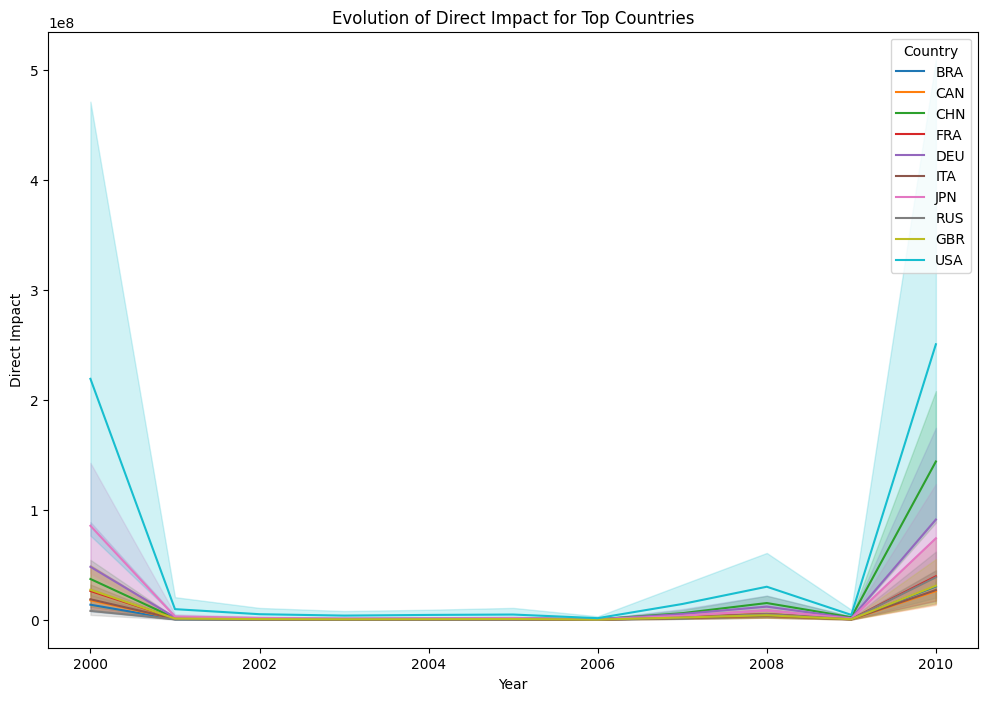

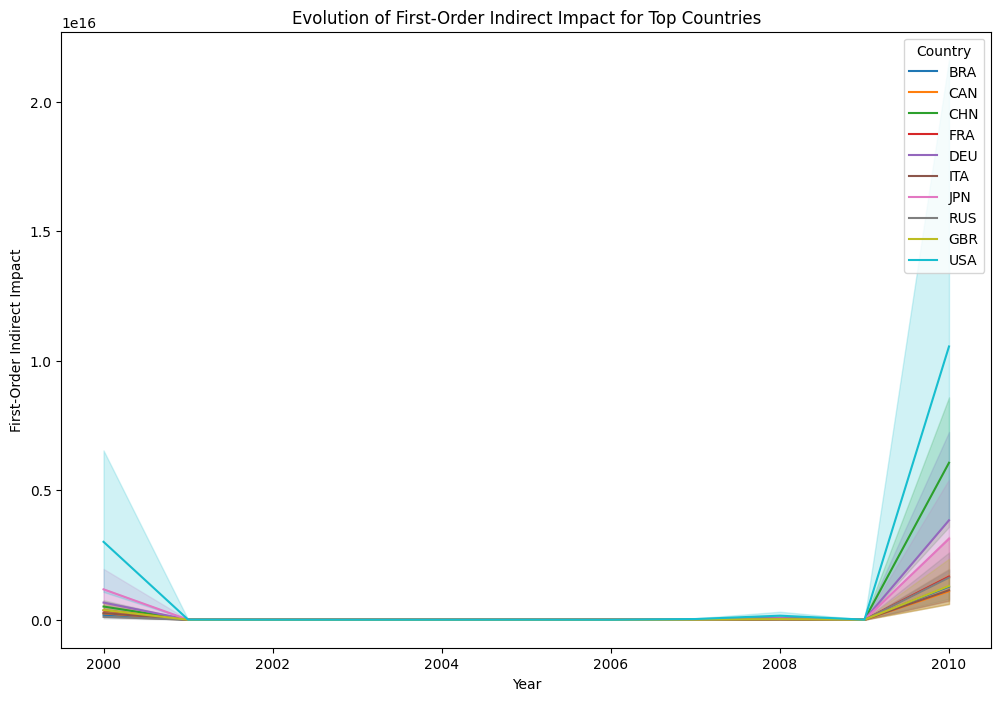

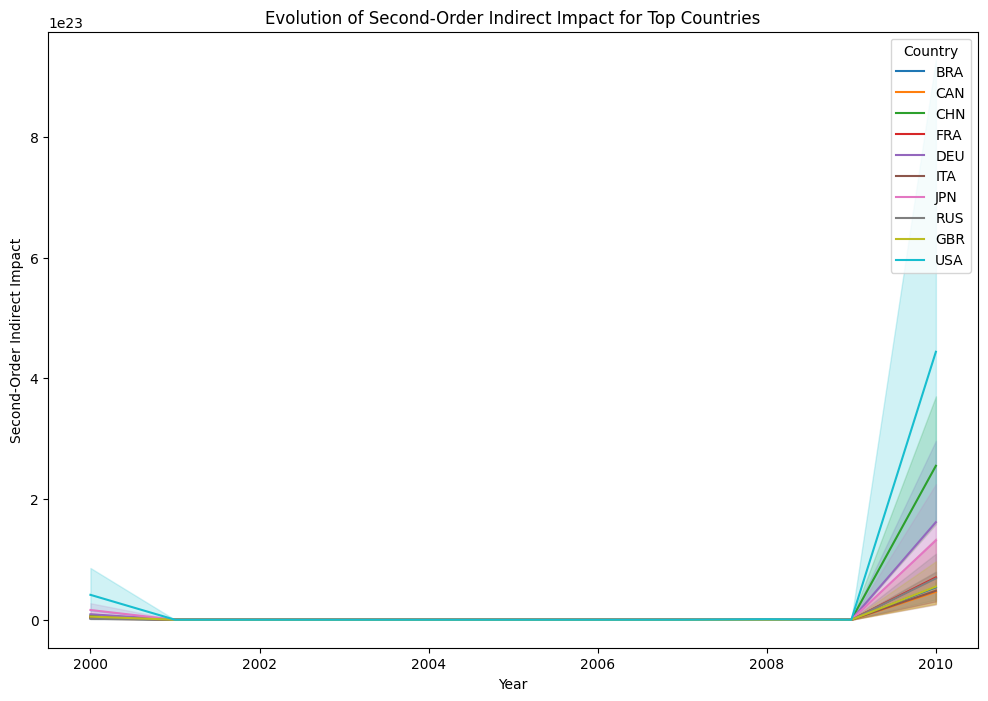

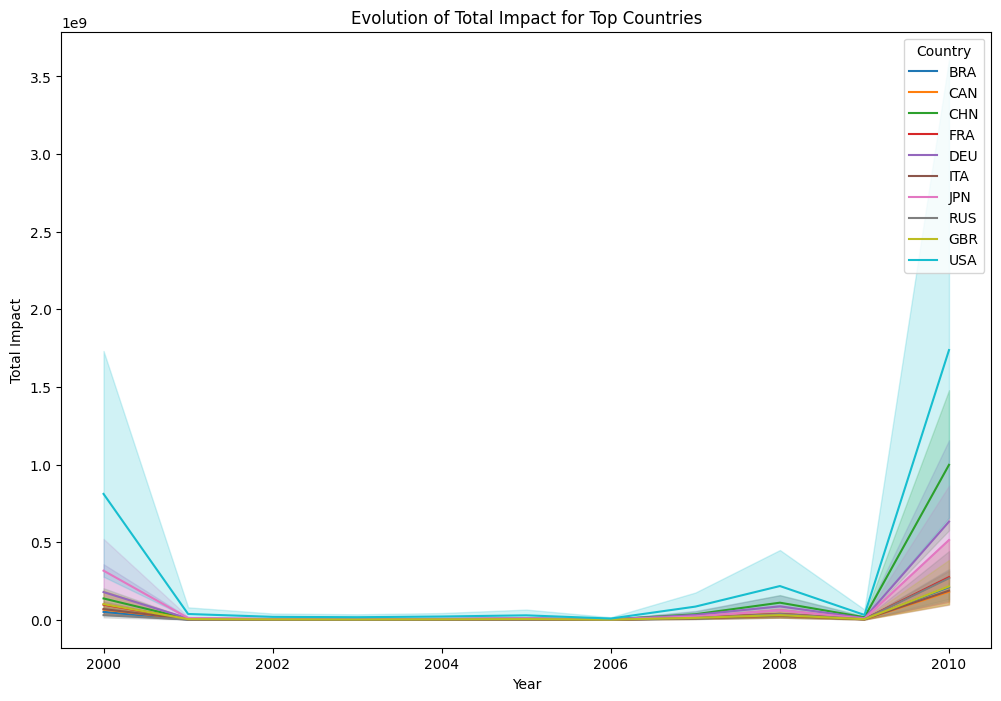

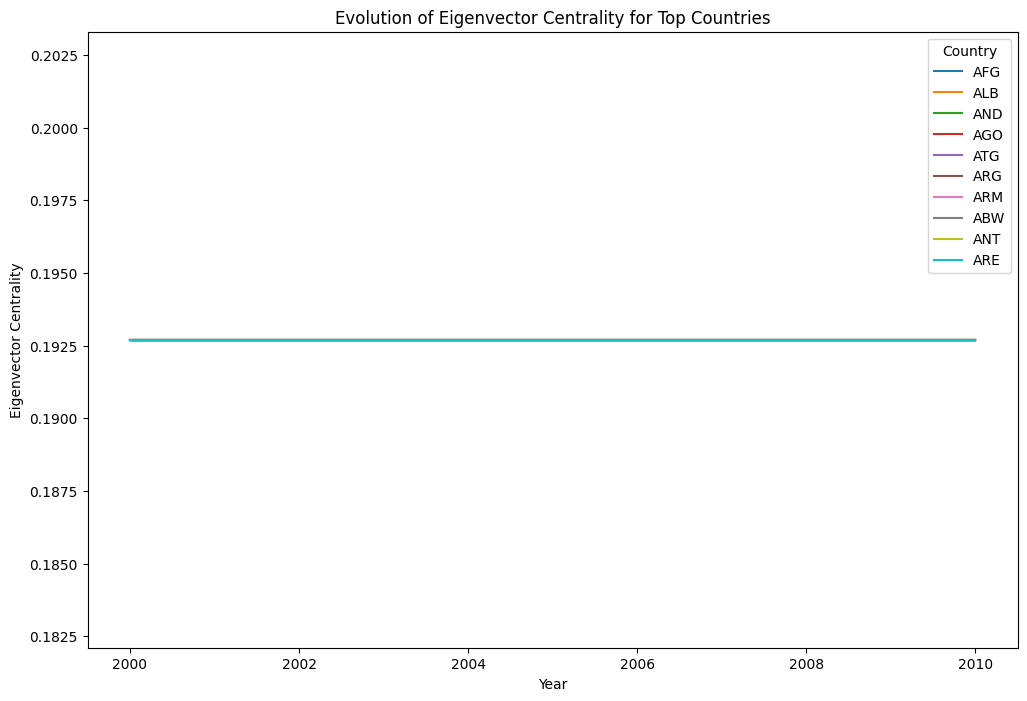

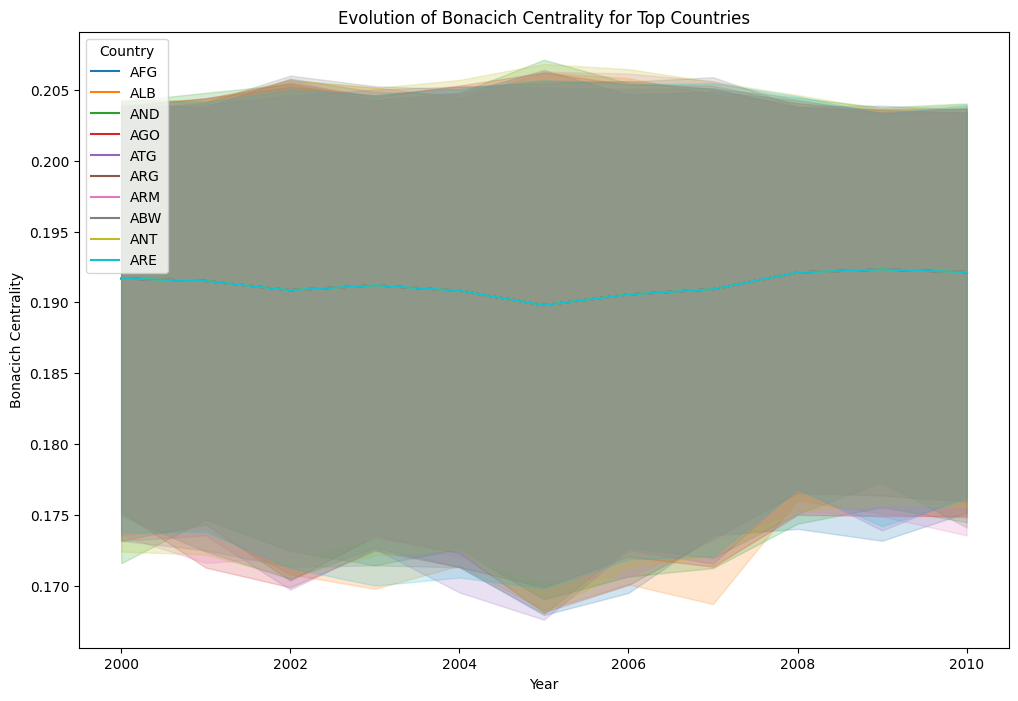

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot the evolution of a variable for the top countries over the years
def plot_variable_evolution_by_country(df, variable, title):
    top_countries = df.groupby('Country')[variable].sum().nlargest(10).index
    filtered_results = df[df['Country'].isin(top_countries)]

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=filtered_results, x='Year', y=variable, hue='Country')
    plt.title(f'Evolution of {title} for Top Countries')
    plt.xlabel('Year')
    plt.ylabel(title)
    plt.legend(title='Country')
    plt.show()

# Variables to plot
variables = {
    'Direct Impact': 'Direct Impact',
    'First-Order Indirect Impact': 'First-Order Indirect Impact',
    'Second-Order Indirect Impact': 'Second-Order Indirect Impact',
    'Total Impact': 'Total Impact',
    'Eigenvector Centrality': 'Eigenvector Centrality',
    'Bonacich Centrality': 'Bonacich Centrality'
}

# Filter the DataFrame to include only the years 2000 to 2010
filtered_years = all_results[(all_results['Year'] >= 2000) & (all_results['Year'] <= 2010)]

# Plot each variable for the filtered years
for var, title in variables.items():
    plot_variable_evolution_by_country(filtered_years, var, title)


**NOT WORKING WELL YET**

Try to expand the analysis to be more optimized for both visualization and the tables creation.

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the analysis function to include augmented analysis for Sankey and emissions summary
def perform_analysis_augmented(year):
    # Set the paths based on the given year
    base_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp/'

    # Read the files into DataFrames
    Eora_pp_T = pd.read_csv(base_path + f'Eora26_{year}_pp_T.txt', sep='\t', header=None)
    labels_T = pd.read_csv(base_path + 'labels_T.txt', sep='\t', header=None)

    # Extract sector and country labels
    sector_labels = labels_T.iloc[:, 3].values
    country_labels = labels_T.iloc[:, 1].values
    country_sector_labels = [f"{country}_{sector}" for country, sector in zip(country_labels, sector_labels)]

    # Transform data frames into matrices
    Eora_pp_T_matrix = Eora_pp_T.values

    # Initialize lists for source, target, and value
    sources = []
    targets = []
    values = []

    num_nodes = Eora_pp_T_matrix.shape[0]

    # Iterate through the transaction matrix to construct the source, target, and value lists
    for i in range(num_nodes):
        for j in range(num_nodes):
            value = Eora_pp_T_matrix[i, j]
            if value > 0:  # Only consider non-zero values
                sources.append(country_sector_labels[i])
                targets.append(country_sector_labels[j])
                values.append(value)

    return sources, targets, values

def perform_analysis_augmented_to_tables(years):
    all_data = []
    summary_imported_list = []
    summary_exported_list = []

    for year in years:
        sources, targets, values = perform_analysis_augmented(year)
        year_data = pd.DataFrame({
            'Year': year,
            'Source': sources,
            'Target': targets,
            'Value': values
        })
        all_data.append(year_data)

        # Create a DataFrame for the Sankey diagram and summary
        sankey_data = pd.DataFrame({'source': sources, 'target': targets, 'value': values})

        # Aggregate by countries for summary
        sankey_data['source_country'] = sankey_data['source'].str.split('_').str[0]
        sankey_data['target_country'] = sankey_data['target'].str.split('_').str[0]

        # Group by source and target countries, summing the values
        grouped = sankey_data.groupby(['source_country', 'target_country'], as_index=False)['value'].sum()

        # Separate the data into emissions imported by Turkey and exported from Turkey
        imported_by_turkey = grouped[grouped['target_country'] == 'TUR']
        exported_from_turkey = grouped[grouped['source_country'] == 'TUR']

        # Create summary tables
        summary_imported_by_turkey = imported_by_turkey[['source_country', 'value']].rename(columns={'source_country': 'Country', 'value': 'Emissions Imported'})
        summary_exported_from_turkey = exported_from_turkey[['target_country', 'value']].rename(columns={'target_country': 'Country', 'value': 'Emissions Exported'})

        summary_imported_by_turkey['Year'] = year
        summary_exported_from_turkey['Year'] = year

        summary_imported_list.append(summary_imported_by_turkey)
        summary_exported_list.append(summary_exported_from_turkey)

    all_years_data = pd.concat(all_data, ignore_index=True)
    summary_imported_df = pd.concat(summary_imported_list, ignore_index=True)
    summary_exported_df = pd.concat(summary_exported_list, ignore_index=True)

    # Save the summary tables to CSV files
    all_years_data.to_csv('/content/drive/MyDrive/Yannis/all_years_emissions_data.csv', index=False)
    summary_imported_df.to_csv('/content/drive/MyDrive/Yannis/emissions_imported_by_turkey_summary.csv', index=False)
    summary_exported_df.to_csv('/content/drive/MyDrive/Yannis/emissions_exported_from_turkey_summary.csv', index=False)

    # Display the summary tables
    print("All Years Emissions Data:")
    print(all_years_data)
    print("Emissions Imported by Turkey Summary:")
    print(summary_imported_df)
    print("Emissions Exported from Turkey Summary:")
    print(summary_exported_df)

# Define the range of years
years_to_analyze = range(2005, 2016)

# Run the analysis for the defined range of years
perform_analysis_augmented_to_tables(years_to_analyze)

All Years Emissions Data:
           Year           Source                                    Target  \
0          2005  AFG_Agriculture                           AFG_Agriculture   
1          2005  AFG_Agriculture                               AFG_Fishing   
2          2005  AFG_Agriculture                  AFG_Mining and Quarrying   
3          2005  AFG_Agriculture                      AFG_Food & Beverages   
4          2005  AFG_Agriculture          AFG_Textiles and Wearing Apparel   
...         ...              ...                                       ...   
253465088  2015        ROW_TOTAL                 ZWE_Public Administration   
253465089  2015        ROW_TOTAL  ZWE_Education, Health and Other Services   
253465090  2015        ROW_TOTAL                    ZWE_Private Households   
253465091  2015        ROW_TOTAL                                ZWE_Others   
253465092  2015        ROW_TOTAL                 ZWE_Re-export & Re-import   

                  Value  
0          

# **Visualize as a Sankey Diagram**

---

Sankey Diagrams are better to visualize the paths within a system. However, I don't know how to do the circular Sankey-Diagram, that allows to see multiple Sankey-Diagrams in one go, for all countries. I prefer to show one country as an example, and change later on if necessary.

In [30]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Ensure Plotly is installed
!pip install plotly

# Load the results if they are not in memory
results = pd.read_csv('/content/drive/MyDrive/Yannis/results_analysis.csv')

# Define the analysis function
def perform_analysis_augmented(year):
    # Set the paths based on the given year
    base_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp/'

    # Read the files into DataFrames
    Eora_pp_T = pd.read_csv(base_path + f'Eora26_{year}_pp_T.txt', sep='\t', header=None)
    labels_T = pd.read_csv(base_path + 'labels_T.txt', sep='\t', header=None)

    # Extract sector and country labels
    sector_labels = labels_T.iloc[:, 3].values
    country_labels = labels_T.iloc[:, 1].values
    country_sector_labels = [f"{country}_{sector}" for country, sector in zip(country_labels, sector_labels)]

    # Transform data frames into matrices
    Eora_pp_T_matrix = Eora_pp_T.values

    # Initialize lists for source, target, and value
    sources = []
    targets = []
    values = []

    num_nodes = Eora_pp_T_matrix.shape[0]

    # Iterate through the transaction matrix to construct the source, target, and value lists
    for i in range(num_nodes):
        for j in range(num_nodes):
            value = Eora_pp_T_matrix[i, j]
            if value > 0:  # Only consider non-zero values
                sources.append(country_sector_labels[i])
                targets.append(country_sector_labels[j])
                values.append(value)

    return sources, targets, values

# Perform the analysis for a specific year (e.g., 2016)
year_to_analyze = 2016
sources, targets, values = perform_analysis_augmented(year_to_analyze)

# Create a DataFrame for the Sankey diagram
sankey_data = pd.DataFrame({'source': sources, 'target': targets, 'value': values})

# Filter for Turkey as either source or target
turkey_involved = sankey_data[sankey_data['source'].str.contains('TUR') | sankey_data['target'].str.contains('TUR')].copy()

# Aggregate by countries
turkey_involved['source_country'] = turkey_involved['source'].str.split('_').str[0]
turkey_involved['target_country'] = turkey_involved['target'].str.split('_').str[0]

# Group by source and target countries, summing the values
grouped = turkey_involved.groupby(['source_country', 'target_country'], as_index=False)['value'].sum()

# Separate the data into three categories:
# - Emissions targeting Turkey (source to TUR)
# - Emissions from Turkey to others (TUR to target)
# - Involvement of Turkey (both source and target)

to_turkey = grouped[grouped['target_country'] == 'TUR']
from_turkey = grouped[grouped['source_country'] == 'TUR']

# Debugging: print the data to ensure it is correct
print("To Turkey:")
print(to_turkey)
print("From Turkey:")
print(from_turkey)

# Labels for Sankey
labels = list(set(to_turkey['source_country']).union(set(from_turkey['target_country'])))
labels.append('TUR')

# Mapping labels to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Prepare the data for Plotly
source_indices = [label_indices[src] for src in to_turkey['source_country']] + [label_indices['TUR']] * len(from_turkey)
target_indices = [label_indices['TUR']] * len(to_turkey) + [label_indices[tgt] for tgt in from_turkey['target_country']]
values = list(to_turkey['value']) + list(from_turkey['value'])

# Debugging: check the prepared data
print("Labels:", labels)
print("Source Indices:", source_indices)
print("Target Indices:", target_indices)
print("Values:", values)

# Visualize only a subset of the data for testing
subset_size = 50
subset_source_indices = source_indices[:subset_size]
subset_target_indices = target_indices[:subset_size]
subset_values = values[:subset_size]

# Create the Sankey diagram with subset data
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=subset_source_indices,
        target=subset_target_indices,
        value=subset_values
    ))])

fig.update_layout(title_text="Sankey Diagram for Turkey's Emissions (Subset)", font_size=10)
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Yannis/Eora26_All/Eora26_2016_bp/Eora26_2016_pp_T.txt'

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Ensure Plotly is installed
!pip install plotly

# Load the results if they are not in memory
results = pd.read_csv('/content/drive/MyDrive/Yannis/results_analysis.csv')

# Define the analysis function
def perform_analysis_augmented(year):
    # Set the paths based on the given year
    base_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp/'

    # Read the files into DataFrames
    Eora_pp_T = pd.read_csv(base_path + f'Eora26_{year}_pp_T.txt', sep='\t', header=None)
    labels_T = pd.read_csv(base_path + 'labels_T.txt', sep='\t', header=None)

    # Extract sector and country labels
    sector_labels = labels_T.iloc[:, 3].values
    country_labels = labels_T.iloc[:, 1].values
    country_sector_labels = [f"{country}_{sector}" for country, sector in zip(country_labels, sector_labels)]

    # Transform data frames into matrices
    Eora_pp_T_matrix = Eora_pp_T.values

    # Initialize lists for source, target, and value
    sources = []
    targets = []
    values = []

    num_nodes = Eora_pp_T_matrix.shape[0]

    # Iterate through the transaction matrix to construct the source, target, and value lists
    for i in range(num_nodes):
        for j in range(num_nodes):
            value = Eora_pp_T_matrix[i, j]
            if value > 0:  # Only consider non-zero values
                sources.append(country_sector_labels[i])
                targets.append(country_sector_labels[j])
                values.append(value)

    return sources, targets, values

# Perform the analysis for a specific year (e.g., 2016)
year_to_analyze = 2016
sources, targets, values = perform_analysis_augmented(year_to_analyze)

# Create a DataFrame for the Sankey diagram
sankey_data = pd.DataFrame({'source': sources, 'target': targets, 'value': values})

# Filter for Turkey as the source
turkey_as_source = sankey_data[sankey_data['source'].str.contains('TUR')].copy()

# Aggregate by countries
turkey_as_source['source_country'] = turkey_as_source['source'].str.split('_').str[0]
turkey_as_source['target_country'] = turkey_as_source['target'].str.split('_').str[0]

# Group by source and target countries, summing the values
grouped = turkey_as_source.groupby(['source_country', 'target_country'], as_index=False)['value'].sum()

# Separate the data:
# - Emissions from Turkey to others (TUR to target)

from_turkey = grouped[grouped['source_country'] == 'TUR']

# Debugging: print the data to ensure it is correct
print("From Turkey:")
print(from_turkey)

# Labels for Sankey
labels = list(set(from_turkey['target_country']))
labels.append('TUR')

# Mapping labels to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Prepare the data for Plotly
source_indices = [label_indices['TUR']] * len(from_turkey)
target_indices = [label_indices[tgt] for tgt in from_turkey['target_country']]
values = list(from_turkey['value'])

# Debugging: check the prepared data
print("Labels:", labels)
print("Source Indices:", source_indices)
print("Target Indices:", target_indices)

# Visualize only a subset of the data for testing
subset_size = 50
subset_source_indices = source_indices[:subset_size]
subset_target_indices = target_indices[:subset_size]
subset_values = values[:subset_size]

# Create the Sankey diagram with subset data
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=subset_source_indices,
        target=subset_target_indices,
        value=subset_values
    ))])

fig.update_layout(title_text="Sankey Diagram for Turkey's Emissions (Source)", font_size=10)
fig.show()


From Turkey:
    source_country target_country          value
0              TUR            ABW    4328.737760
1              TUR            AFG   48942.985117
2              TUR            AGO   21593.314894
3              TUR            ALB  432299.249884
4              TUR            AND    1629.002004
..             ...            ...            ...
185            TUR            WSM    3144.246285
186            TUR            YEM  133984.925486
187            TUR            ZAF  535952.431401
188            TUR            ZMB    4003.111337
189            TUR            ZWE    7925.491010

[190 rows x 3 columns]
Labels: ['GBR', 'GTM', 'BEN', 'CRI', 'BLR', 'NIC', 'MUS', 'TJK', 'MEX', 'CUB', 'GRC', 'ISR', 'SYC', 'BWA', 'CHN', 'PHL', 'IRQ', 'IDN', 'CYM', 'BGR', 'LTU', 'SWE', 'ESP', 'BRB', 'NCL', 'ETH', 'HUN', 'ATG', 'GIN', 'NZL', 'PYF', 'FJI', 'KAZ', 'SWZ', 'GEO', 'NAM', 'ARE', 'COL', 'MAR', 'OMN', 'STP', 'PNG', 'TUR', 'USR', 'VGB', 'ISL', 'MDV', 'SLV', 'AFG', 'HRV', 'CPV', 'YEM', 'L

In [ ]:
import os
import pandas as pd
import numpy as np

# Define the analysis function to include augmented analysis for Sankey and emissions summary
def perform_analysis_augmented(year):
    # Set the paths based on the given year
    base_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp/'

    # Read the files into DataFrames
    Eora_pp_T = pd.read_csv(base_path + f'Eora26_{year}_pp_T.txt', sep='\t', header=None)
    labels_T = pd.read_csv(base_path + 'labels_T.txt', sep='\t', header=None)

    # Extract sector and country labels
    sector_labels = labels_T.iloc[:, 3].values
    country_labels = labels_T.iloc[:, 1].values
    country_sector_labels = [f"{country}_{sector}" for country, sector in zip(country_labels, sector_labels)]

    # Transform data frames into matrices
    Eora_pp_T_matrix = Eora_pp_T.values

    # Initialize lists for source, target, and value
    sources = []
    targets = []
    values = []

    num_nodes = Eora_pp_T_matrix.shape[0]

    # Iterate through the transaction matrix to construct the source, target, and value lists
    for i in range(num_nodes):
        for j in range(num_nodes):
            value = Eora_pp_T_matrix[i, j]
            if value > 0:  # Only consider non-zero values
                sources.append(country_sector_labels[i])
                targets.append(country_sector_labels[j])
                values.append(value)

    return sources, targets, values

# Perform the analysis for a specific year (e.g., 2016)
year_to_analyze = 2016
sources, targets, values = perform_analysis_augmented(year_to_analyze)

# Create a DataFrame for the Sankey diagram and summary
sankey_data = pd.DataFrame({'source': sources, 'target': targets, 'value': values})

# Aggregate by countries for summary
sankey_data['source_country'] = sankey_data['source'].str.split('_').str[0]
sankey_data['target_country'] = sankey_data['target'].str.split('_').str[0]

# Group by source and target countries, summing the values
grouped = sankey_data.groupby(['source_country', 'target_country'], as_index=False)['value'].sum()

# Separate the data into emissions imported by Turkey and exported from Turkey
imported_by_turkey = grouped[grouped['target_country'] == 'TUR']
exported_from_turkey = grouped[grouped['source_country'] == 'TUR']

# Create summary tables
summary_imported_by_turkey = imported_by_turkey[['source_country', 'value']].rename(columns={'source_country': 'Country', 'value': 'Emissions Imported'})
summary_exported_from_turkey = exported_from_turkey[['target_country', 'value']].rename(columns={'target_country': 'Country', 'value': 'Emissions Exported'})

# Display the summary tables
imported_by_turkey_summary = summary_imported_by_turkey.reset_index(drop=True)
exported_from_turkey_summary = summary_exported_from_turkey.reset_index(drop=True)

# Debugging: print the summary tables to ensure they are correct
print("Emissions Imported by Turkey:")
print(imported_by_turkey_summary)
print("Emissions Exported from Turkey:")
print(exported_from_turkey_summary)

Emissions Imported by Turkey:
    Country  Emissions Imported
0       ABW         5039.031897
1       AFG        35613.486829
2       AGO         1855.365620
3       ALB       270105.036735
4       AND         1645.158804
..      ...                 ...
185     WSM          353.758838
186     YEM          471.312684
187     ZAF       566443.919980
188     ZMB         7368.214236
189     ZWE         1862.706009

[190 rows x 2 columns]
Emissions Exported from Turkey:
    Country  Emissions Exported
0       ABW         4328.737760
1       AFG        48942.985117
2       AGO        21593.314894
3       ALB       432299.249884
4       AND         1629.002004
..      ...                 ...
185     WSM         3144.246285
186     YEM       133984.925486
187     ZAF       535952.431401
188     ZMB         4003.111337
189     ZWE         7925.491010

[190 rows x 2 columns]


**Path Decomposition and Categorization**

---


For path decomposition, the goal is to identify and quantify specific types of paths based on certain characteristics. This can provide insights into how different kinds of connections (e.g., within the same sector, across specific sectors, or between countries) contribute to the overall impact.

Steps to Code Path Decomposition:
Identify Paths: Utilize the powers of the Leontief matrix you compute. Each element
𝐿
𝑘
[
𝑖
,
𝑗
]
L
k
 [i,j] in the matrix raised to the power
𝑘
k represents the path impact from sector
𝑖
i to
𝑗
j through exactly
𝑘
−
1
k−1 intermediate sectors.


**Categorize Paths:**

---



By Length: Already computed this(—paths of length 1, 2, 3, etc.
By Sector Type: Identify whether paths are intra-sector (same start and end sector), inter-sector, within the same country, or international.
Critical Path Analysis: Identify paths that contribute significantly to the total impact, possibly filtering out paths that contribute below a certain threshold.
Aggregate Impacts by Category: Sum up the impacts for each category to see their relative contributions.

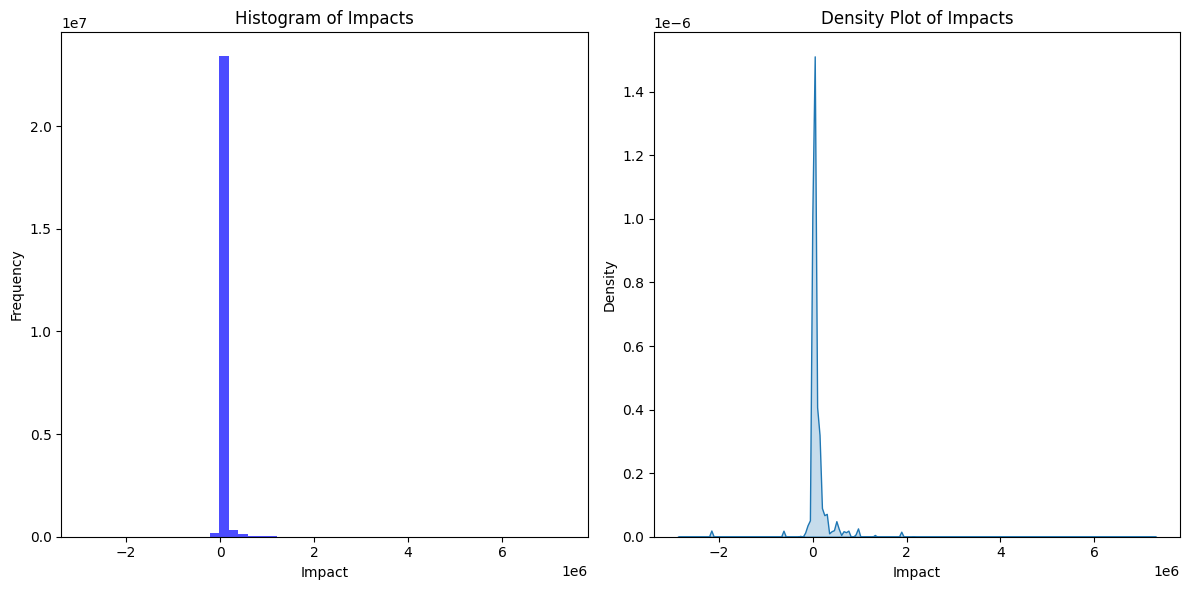

90th Percentile: 31783.143134322298
95th Percentile: 80329.31970021588
99th Percentile: 360164.3017430937


In [ ]:
#Visualize the distribution of the impacts to orient the choice of the adequate threshold to use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

def load_variables(year):
    # Construct the path to the pickle file
    file_path = f'/content/drive/MyDrive/Yannis/variables_{year}.pkl'

    # Open the pickle file and load the data
    with open(file_path, 'rb') as file:
        data = pickle.load(file)

    return data

# Example usage:
year_to_load = 2016
data = load_variables(year_to_load)

# Now you can access any of the variables saved in the file
L = data['L']  # Access the Leontief inverse matrix

def plot_impact_distribution(L):
    # Flatten the matrix to a one-dimensional array of impacts
    impacts = L.flatten()

    # Plotting the histogram of impacts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(impacts, bins=50, color='blue', alpha=0.7)
    plt.title('Histogram of Impacts')
    plt.xlabel('Impact')
    plt.ylabel('Frequency')

    # Plotting the density of impacts
    plt.subplot(1, 2, 2)
    sns.kdeplot(impacts, fill=True)
    plt.title('Density Plot of Impacts')
    plt.xlabel('Impact')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Analyzing percentiles
    percentiles = np.percentile(impacts, [90, 95, 99])
    print("90th Percentile:", percentiles[0])
    print("95th Percentile:", percentiles[1])
    print("99th Percentile:", percentiles[2])

plot_impact_distribution(L)

**Interpretation : **

The distribution of production impact is very skewed to the right, with the vast majority being centered around 0, meaning that only a few paths really have a deeply positive production impact. Interestingly, some paths have negative values. Either this is an error, or this implies some paths have a carbon-sink capacity. This seems odd as all sectors should in theory increase production in the ways they are being used for final consumption.

Let's look at the distribution of Total Impact for emissions to see if there is such negative values in paths

In [ ]:
data['total_impact'].shape

(4915,)

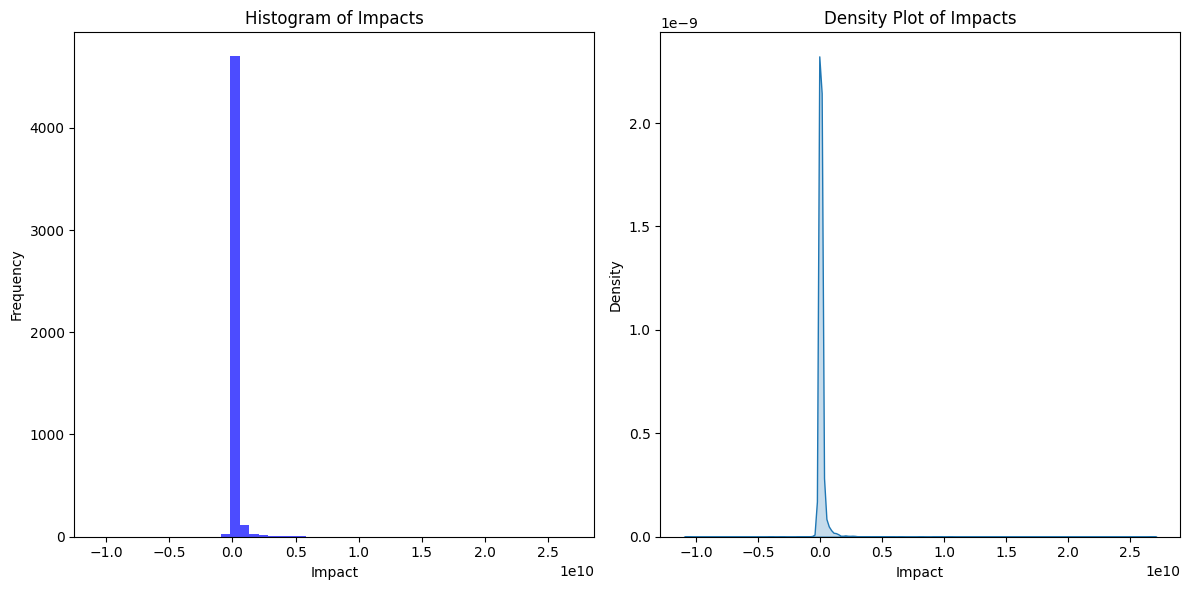

90th Percentile: 155920307.5596791
95th Percentile: 393559774.3345404
99th Percentile: 1767535280.0795658


In [ ]:
def plot_impact_distribution(data):
    # Flatten the matrix to a one-dimensional array of impacts
    impacts = data['total_impact']

    # Plotting the histogram of impacts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(impacts, bins=50, color='blue', alpha=0.7)
    plt.title('Histogram of Impacts')
    plt.xlabel('Impact')
    plt.ylabel('Frequency')

    # Plotting the density of impacts
    plt.subplot(1, 2, 2)
    sns.kdeplot(impacts, fill=True)
    plt.title('Density Plot of Impacts')
    plt.xlabel('Impact')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    # Analyzing percentiles
    percentiles = np.percentile(impacts, [90, 95, 99])
    print("90th Percentile:", percentiles[0])
    print("95th Percentile:", percentiles[1])
    print("99th Percentile:", percentiles[2])

plot_impact_distribution(data)

In [ ]:
import numpy as np

def analyze_negative_emissions(sectors, emissions_matrix):
    negative_sectors = {}
    n = emissions_matrix.shape[0]
    for i in range(n):
        total_emissions = np.sum(emissions_matrix[i, :])
        if total_emissions < 0:  # Sector i has net negative emissions
            negative_sectors[sectors[i]] = total_emissions

    return negative_sectors

# Assuming you have sector labels and an emissions matrix loaded
negative_emissions_sectors = analyze_negative_emissions(data['sector_labels'], data['Eora_pp_Q_emissions_matrix'])
print("Sectors with Net Negative Emissions:", negative_emissions_sectors)


Sectors with Net Negative Emissions: {}


Very odd. No sectors seem to have negative emissions values ?

Let's investigate paths then.

In [ ]:
import numpy as np

def analyze_negative_emissions_paths(L, sectors, emissions_matrix):
    # Identify sectors with net negative emissions
    negative_sectors_indices = [i for i in range(len(sectors)) if np.sum(emissions_matrix[:, i]) < 0]
    negative_paths_info = {}

    # Analyze paths originating from these sectors
    for idx in negative_sectors_indices:
        sector = sectors[idx]
        # Extract the row from L corresponding to the negative emissions sector
        impacts_from_sector = L[idx, :]

        # Store data on how this sector's negative impact spreads to others
        negative_paths_info[sector] = {sectors[j]: impacts_from_sector[j] for j in range(len(sectors)) if impacts_from_sector[j] > 0}

    return negative_paths_info

# Usage:
L = data['L']  # Leontief inverse matrix
sectors = data['sector_labels']
emissions_matrix = data['Eora_pp_Q_emissions_matrix']
negative_emissions_paths = analyze_negative_emissions_paths(L, sectors, emissions_matrix)

# Printing to review results
for sector, impacts in negative_emissions_paths.items():
    print(f"Negative Emissions Paths from {sector}:")
    for target_sector, impact in impacts.items():
        print(f"  - To {target_sector}: Impact = {impact}")


In [ ]:
def categorize_paths(L, labels, threshold=0.01):
    categorized_impacts = {
        'intra_sector': 0,
        'inter_sector': 0,
        'international': 0,
        'critical_paths': []
    }

    n = L.shape[0]
    for i in range(n):
        for j in range(n):
            impact = L[i, j]
            if impact > threshold:
                categorized_impacts['critical_paths'].append((i, j, impact))
            if labels[i][1] == labels[j][1]:  # Assuming labels contain sector and country info
                categorized_impacts['intra_sector'] += impact
            else:
                categorized_impacts['inter_sector'] += impact
            if labels[i][0] != labels[j][0]:  # Country comparison
                categorized_impacts['international'] += impact

    return categorized_impacts


In [ ]:
data.keys()

dict_keys(['Eora_pp_FD', 'labels_FD', 'Eora_pp_Q', 'labels_Q', 'Eora_pp_QY', 'Eora_pp_T', 'labels_T', 'Eora_pp_VA', 'labels_VA', 'Eora_pp_T_matrix', 'Eora_pp_Q_emissions_matrix', 'xout', 'A', 'f', 'I', 'L', 'paths', 'sector_labels', 'country_labels', 'country_sector_labels', 'total_impact', 'centrality', 'bonacich_centrality'])

**Trend Analysis**

---


Objective: Calculate the total emissions imported and exported by each country for each year and identify countries with the highest growth rates in emissions transactions.

Source
SUD_Finacial Intermediation and Business Activities          188.205714
SUD_Petroleum, Chemical and Non-Metallic Mineral Products     55.768141
SUD_Wholesale Trade                                           44.954799
SUD_Electrical and Machinery                                  42.463519
SDS_Finacial Intermediation and Business Activities           32.173170
SUD_Post and Telecommunications                               26.203658
SUD_Metal Products                                            25.895263
SUD_Wood and Paper                                            23.339165
SUD_Education, Health and Other Services                      18.141677
SUD_Transport                                                 18.058913
Name: GrowthRate, dtype: float64


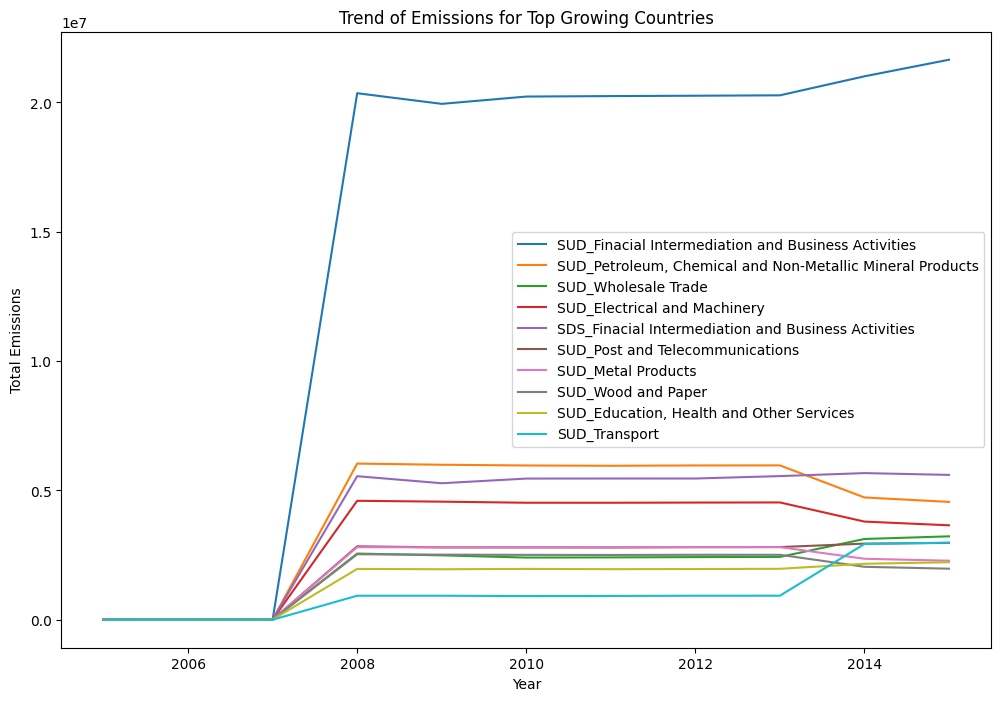

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
all_years_data = pd.read_csv('/content/drive/MyDrive/Yannis/all_years_emissions_data.csv')

# Calculate total emissions imported and exported by each country for each year
country_yearly_emissions = all_years_data.groupby(['Year', 'Source'])['Value'].sum().reset_index()

# Calculate growth rates for each country
country_growth = country_yearly_emissions.groupby('Source')['Value'].pct_change().fillna(0)

# Add growth rates to the dataframe
country_yearly_emissions['GrowthRate'] = country_growth

# Identify countries with highest growth rates
top_countries_growth = country_yearly_emissions.groupby('Source')['GrowthRate'].mean().sort_values(ascending=False).head(10)

print(top_countries_growth)

# Plot trend of top countries
plt.figure(figsize=(12, 8))
for country in top_countries_growth.index:
    country_data = country_yearly_emissions[country_yearly_emissions['Source'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)
plt.title('Trend of Emissions for Top Growing Countries')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
plt.legend()
plt.show()


2. Ranking Changes
Objective: Rank countries based on their emissions transactions for each year and observe how their ranks change over time.

In [ ]:
# Calculate total emissions imported and exported by each country for each year
country_yearly_emissions = all_years_data.groupby(['Year', 'Source'])['Value'].sum().reset_index()

# Rank countries based on emissions for each year
country_yearly_emissions['Rank'] = country_yearly_emissions.groupby('Year')['Value'].rank(ascending=False)

# Pivot the table to have years as columns and countries as rows
ranking_pivot = country_yearly_emissions.pivot(index='Source', columns='Year', values='Rank')

# Plot ranking changes for selected countries
plt.figure(figsize=(12, 8))
selected_countries = ranking_pivot.mean(axis=1).nsmallest(10).index  # Top 10 countries by average rank
for country in selected_countries:
    plt.plot(ranking_pivot.columns, ranking_pivot.loc[country], label=country)
plt.title('Ranking Changes Over Time for Top Countries')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.legend()
plt.show()


3. Sectoral Shifts
Objective: Analyze how the share of total emissions contributed by different sectors changes over the years.

In [ ]:
# Load data
import pandas as pd
import matplotlib.pyplot as plt
summary_imported_df = pd.read_csv('/content/drive/MyDrive/Yannis/emissions_imported_by_turkey_summary.csv')

# Calculate total emissions for each sector across all countries for each year
sector_yearly_emissions = summary_imported_df.groupby(['Year', 'Country'])['Emissions Imported'].sum().reset_index()

# Calculate the share of each sector in total emissions for each year
total_emissions_per_year = sector_yearly_emissions.groupby('Year')['Emissions Imported'].sum().reset_index()
sector_yearly_emissions = sector_yearly_emissions.merge(total_emissions_per_year, on='Year', suffixes=('', '_Total'))
sector_yearly_emissions['Share'] = sector_yearly_emissions['Emissions Imported'] / sector_yearly_emissions['Emissions Imported_Total']

# Pivot the table to have years as columns and sectors as rows
sector_pivot = sector_yearly_emissions.pivot(index='Country', columns='Year', values='Share')

# Plot sectoral shifts for selected sectors
plt.figure(figsize=(12, 8))
selected_sectors = sector_pivot.mean(axis=1).nlargest(10).index  # Top 10 sectors by average share
for sector in selected_sectors:
    plt.plot(sector_pivot.columns, sector_pivot.loc[sector], label=sector)
plt.title('Sectoral Shifts Over Time')
plt.xlabel('Year')
plt.ylabel('Share of Total Emissions')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Yannis/emissions_imported_by_turkey_summary.csv'

# Sankey Diagrams for Korea, Bangladesh and Brazil

## Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import zipfile
import os
import pickle

# Store data using named keys
def load_eora_data_dict(year):
    print(f'Loading Eora data for the year {year}')
    zip_file_path = f'/content/drive/MyDrive/Yannis/Eora26_All/Eora26_{year}_bp.zip'

    with zipfile.ZipFile(zip_file_path, 'r') as z:
        data = {
            'Eora_pp_T': pd.read_csv(z.open(f'Eora26_{year}_bp_T.txt'), sep='\t', header=None),
            'Eora_pp_FD': pd.read_csv(z.open(f'Eora26_{year}_bp_FD.txt'), sep='\t', header=None),
            'Eora_pp_VA': pd.read_csv(z.open(f'Eora26_{year}_bp_VA.txt'), sep='\t', header=None),
            'Eora_pp_Q': pd.read_csv(z.open(f'Eora26_{year}_bp_Q.txt'), sep='\t', header=None),
            'Eora_pp_QY': pd.read_csv(z.open(f'Eora26_{year}_bp_QY.txt'), sep='\t', header=None),
            'labels_T': pd.read_csv(z.open('labels_T.txt'), sep='\t', header=None),
            'labels_FD': pd.read_csv(z.open('labels_FD.txt'), sep='\t', header=None),
            'labels_VA': pd.read_csv(z.open('labels_VA.txt'), sep='\t', header=None),
            'labels_Q': pd.read_csv(z.open('labels_Q.txt'), sep='\t', header=None)
        }
    return data

def load_sectorial_variables(year, save_path):
    print(f'Loading sectoral variables for the year {year}')
    file_name = f"sectoral_variables_{year}.pkl"
    file_path = os.path.join(save_path, file_name)
    with open(file_path, 'rb') as file:
        return pickle.load(file)

# Load the data for all years from 1990 to 2015
eora_dict = {}
for year in range(1990, 2016):
    eora_dict[year] = load_eora_data_dict(year)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Eora data for the year 1990
Loading Eora data for the year 1991
Loading Eora data for the year 1992
Loading Eora data for the year 1993
Loading Eora data for the year 1994
Loading Eora data for the year 1995
Loading Eora data for the year 1996
Loading Eora data for the year 1997
Loading Eora data for the year 1998
Loading Eora data for the year 1999
Loading Eora data for the year 2000
Loading Eora data for the year 2001
Loading Eora data for the year 2002
Loading Eora data for the year 2003
Loading Eora data for the year 2004
Loading Eora data for the year 2005
Loading Eora data for the year 2006
Loading Eora data for the year 2007
Loading Eora data for the year 2008
Loading Eora data for the year 2009
Loading Eora data for the year 2010
Loading Eora data for the year 2011
Loading Eora data for the year 2012
Loading Eora data for the year 2013
Loading

## Upstream

In [ ]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go

from google.colab import drive
drive.mount('/content/drive')

# Load the results if they are not in memory
results = pd.read_csv('/content/drive/MyDrive/Yannis/1990-2015_results_analysis.csv')

# Define the analysis function
def perform_analysis_augmented(year):
    # Check if the data for the year exists in eora_dict
    if year not in eora_dict:
        print(f"Data for the year {year} not found in eora_dict.")
        return [], [], []

    # Read the files into DataFrames
    Eora_pp_T = eora_dict[year]['Eora_pp_T']
    labels_T = eora_dict[year]['labels_T']

    # Extract sector and country labels
    sector_labels = labels_T.iloc[:, 3].values
    country_labels = labels_T.iloc[:, 1].values
    country_sector_labels = [f"{country}_{sector}" for country, sector in zip(country_labels, sector_labels)]

    # Transform data frames into matrices
    Eora_pp_T_matrix = Eora_pp_T.values

    # Initialize lists for source, target, and value
    sources = []
    targets = []
    values = []

    num_nodes = Eora_pp_T_matrix.shape[0]

    # Iterate through the transaction matrix to construct the source, target, and value lists
    for i in range(num_nodes):
        for j in range(num_nodes):
            value = Eora_pp_T_matrix[i, j]
            if value > 0:  # Only consider non-zero values
                sources.append(country_sector_labels[i])
                targets.append(country_sector_labels[j])
                values.append(value)

    return sources, targets, values

# Perform the analysis for a specific year (e.g., 2015)
year_to_analyze = 2015
sources, targets, values = perform_analysis_augmented(year_to_analyze)

# Check if the sources, targets, and values are populated
if not sources or not targets or not values:
    print(f"No data found for the year {year_to_analyze}.")
else:
    print(f"Data successfully loaded for the year {year_to_analyze}.")

# Create a DataFrame for the Sankey diagram
sankey_data = pd.DataFrame({'source': sources, 'target': targets, 'value': values})

# Function to filter and plot for a specific country
def plot_sankey_for_country(country_code, country_name, subset_size=30, width=1200, height=800, pad=20):
    # Filter for the specified country as either source or target
    country_involved = sankey_data[sankey_data['source'].str.contains(country_code) | sankey_data['target'].str.contains(country_code)].copy()

    # Debugging: Check if data is found for the country
    if country_involved.empty:
        print(f"No data found for {country_name} as source or target.")
        return

    # Aggregate by countries
    country_involved['source_country'] = country_involved['source'].str.split('_').str[0]
    country_involved['target_country'] = country_involved['target'].str.split('_').str[0]

    # Group by source and target countries, summing the values
    grouped = country_involved.groupby(['source_country', 'target_country'], as_index=False)['value'].sum()

    # Debugging: Print the grouped data to verify
    print(f"Grouped data for {country_name}:\n", grouped)

    # Separate the data into three categories:
    to_country = grouped[grouped['target_country'] == country_code]
    from_country = grouped[grouped['source_country'] == country_code]

    # Debugging: Check if there is data to plot
    if to_country.empty and from_country.empty:
        print(f"No transactions involving {country_name}.")
        return

    to_country = to_country.sort_values(by='value', ascending=True)
    from_country = from_country.sort_values(by='value', ascending=True)

    # Labels for Sankey
    labels = list(set(to_country['source_country']).union(set(from_country['target_country'])))
    labels.append(country_code)

    # Mapping labels to indices
    label_indices = {label: i for i, label in enumerate(labels)}

    # Prepare the data for Plotly
    source_indices = [label_indices[src] for src in to_country['source_country']] + [label_indices[country_code]] * len(from_country)
    target_indices = [label_indices[country_code]] * len(to_country) + [label_indices[tgt] for tgt in from_country['target_country']]
    values = list(to_country['value']) + list(from_country['value'])

    # Visualize only a subset of the data for testing
    subset_source_indices = source_indices[:subset_size]
    subset_target_indices = target_indices[:subset_size]
    subset_values = values[:subset_size]

    # Create the Sankey diagram with subset data
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=pad,  # Increase padding for better spacing
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"
        ),
        link=dict(
            source=subset_source_indices,
            target=subset_target_indices,
            value=subset_values
        ))])

    fig.update_layout(
        title_text=f"Sankey Diagram for {country_name}'s Monetary Flows",
        font_size=12,
        width=width,  # Adjust width for better readability
        height=height  # Adjust height for better readability
    )
    fig.show()

# Call the function for each country
plot_sankey_for_country('KOR', 'Korea', subset_size=10, width=1400, height=800, pad=20)
plot_sankey_for_country('BGD', 'Bangladesh', subset_size=10, width=1400, height=1000, pad=20)
plot_sankey_for_country('BRA', 'Brazil', subset_size=10, width=1400, height=1000, pad=20)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Downstream

In [21]:
# Create the Sankey diagram
def plot(sources, targets, values):
   # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=10,  # Decrease the padding
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values
        ))])

    fig.update_layout(
        title_text=f"Sankey Diagram for {country_name}'s Emissions (Source)",
        font_size=12,
        width=1200,  # Adjust the width for better readability
        height=700   # Adjust the height for better readability
    )
    fig.show()

# Call the function for each country
plot_sankey_for_country_source('KOR', 'Korea')
plot_sankey_for_country_source('BGD', 'Bangladesh')
plot_sankey_for_country_source('BRA', 'Brazil')

    fig.update_layout(
        title_text=f"Sankey Diagram for {country_name}'s Monetary Flows (Source)",
        font_size=10,
        width=1000,  # Increase the width for better readability
        height=600   # Increase the height for better readability
    )
    fig.show()

# Call the function for each country
plot_sankey_for_country_source('KOR', 'Korea')
plot_sankey_for_country_source('BGD', 'Bangladesh')
plot_sankey_for_country_source('BRA', 'Brazil')

Data for Korea as source:
     source_country target_country         value
0              KOR            ABW  4.908506e+03
1              KOR            AFG  1.088223e+05
2              KOR            AGO  5.092730e+04
3              KOR            ALB  4.985835e+03
4              KOR            AND  2.025907e+03
..             ...            ...           ...
185            KOR            WSM  2.021174e+03
186            KOR            YEM  5.969853e+04
187            KOR            ZAF  1.114391e+06
188            KOR            ZMB  7.140146e+03
189            KOR            ZWE  5.536140e+03

[190 rows x 3 columns]


Data for Bangladesh as source:
     source_country target_country         value
0              BGD            ABW    444.774627
1              BGD            AFG    464.598427
2              BGD            AGO    630.777438
3              BGD            ALB    359.201679
4              BGD            AND    271.107901
..             ...            ...           ...
185            BGD            WSM    286.879562
186            BGD            YEM    585.980335
187            BGD            ZAF  12674.851933
188            BGD            ZMB    499.485025
189            BGD            ZWE    159.876659

[190 rows x 3 columns]


Data for Brazil as source:
     source_country target_country         value
0              BRA            ABW  1.817750e+04
1              BRA            AFG  2.271301e+03
2              BRA            AGO  8.218557e+05
3              BRA            ALB  2.695668e+03
4              BRA            AND  1.782507e+03
..             ...            ...           ...
185            BRA            WSM  1.204011e+03
186            BRA            YEM  5.887192e+04
187            BRA            ZAF  1.073185e+06
188            BRA            ZMB  3.767763e+03
189            BRA            ZWE  4.793184e+03

[190 rows x 3 columns]
